In [1]:
# Import all the necessary packages

# Shape file for India divided in terms of sub-districts 
# https://hub.arcgis.com/content/cba8bddfa0ab43ddb35a7313376f9438/about

import pandas as pd
import geopandas
import matplotlib.pyplot as plt
from adjustText import adjust_text
import seaborn as sns
from shapely.geometry import Point, Polygon

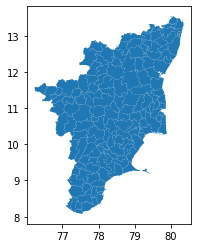

In [19]:
#tn_geodf = geodf.loc[geodf['NAME_1']=='Tamil Nadu']
geo = geopandas.read_file('Demographics_of_India.shp')
geo_tn = geo[geo['statename']=='Tamil Nadu']
geo_tn.head()
#tn_geodf.plot() # conda install descartes
plt.show()

In [20]:
radms_df = pd.read_excel('single_vehicle_out_of_control_crashes_Finalized_twowheeler_Master.xlsx')
radms_df.head()

,acc_id,Year,Season,Day of the week,Accident severity,Accident severity.1,Region,District,Collision type,Number of lanes,...,Helmet,Driver error,Vehicle Maneuver,At fault status,Injury Description,Injury nature,Hospitalization Delay,Hospitalization Mode,Collision Cause,Driver Error
0,SLM/MALLI/00002/2008,2009,Winter,Workday,Simple Injury,Non-Fatal,West,Salem,Hit Animal,Single,...,N,None,Going Ahead,At fault,Hand Injury,Wounds/Cut,Hospital Between 30 Minutes And 1 Hour After A...,Families Friends Or Relatives,Animal Involved In Accident,None
1,KRI/GURUA/00002/2009,2009,Winter,Workday,Simple Injury,Non-Fatal,West,Krishnagiri,Skidding,Single,...,A,Unknown,Turning Right/ Left,At fault,Multiple Injuries,Wounds/Cut,Hospital Within 30 Minutes After Accident,Transported By Ambulance,High Speed,Unknown
2,SLM/sang/00040/2009,2009,Winter,Workday,Fatal,Fatal,West,Salem,Skidding,Two,...,N,Unknown,Going Ahead,At fault,Head Injury,Cranial Trauma,Hospital Within 30 Minutes After Accident,Transported By Ambulance,High Speed,Unknown
3,RMD/RAMAA/00002/2009,2009,Winter,Workday,Simple Injury,Non-Fatal,South,Ramanathapuram,Skidding,Single,...,N,Unknown,Diverging/ merging,At fault,Not Applicable,Not Injured,Not Hospitalised,Not Hospitalised,High Speed,Unknown
4,ERD/MALAY/00001/2009,2009,Winter,Workday,Fatal,Fatal,West,Erode,Skidding,Two,...,N,Carelessness,Going Ahead,At fault,Head Injury,Permanent Disfigurement Of Head Or Face,Hospital Within 30 Minutes After Accident,Transported By Ambulance,High Speed,Improper Turn


In [24]:
geo_tn.distname	.unique()

array(['Ariyalur', 'Sivaganga', 'Thanjavur', 'Tiruvannamalai',
       'Ramanathapuram', 'Tirunelveli', 'Virudhunagar', 'Thiruvarur',
       'Thiruvallur', 'Tiruchirappalli', 'Tiruppur', 'Madurai', 'Karur',
       'Dharmapuri', 'Namakkal', 'Theni', 'Salem', 'Perambalur',
       'Dindigul', 'Cuddalore', 'Pudukkottai', 'Vellore', 'Krishnagiri',
       'Erode', 'Coimbatore', 'Chennai', 'Nagapattinam', 'Viluppuram',
       'Kancheepuram', 'Kanniyakumari', 'Thoothukkudi', 'The Nilgiris'],
      dtype=object)

In [25]:
radms_df.District.unique()

array(['Salem', 'Krishnagiri', 'Ramanathapuram', 'Erode', 'Dharmapuri',
       'Chennai', 'Madurai\n', 'Thiruvannamalai', 'Thiruvallur',
       'Cuddalore', 'Thanjavur', 'Tiruppur', 'Villupuram', 'Kanyakumari',
       'Coimbatore', 'Vellore', 'Nagapattinam', 'Tiruvarur', 'Tuticorin',
       'Namakkal', 'Ariyalur', 'Pudukkottai', 'Karur', 'Thirunelveli',
       'Theni', 'Kancheepuram', 'Perambalur', 'Dindigul', 'Trichy',
       'Nilgiris', 'Sivagangai', 'Virudhunagar'], dtype=object)

In [26]:
# Some of the spellings of district names in both the shape file and our data are different
# Hence, we will replace the district names in our data to match with the shape file

replace_dict = {
    'Madurai\n' : 'Madurai',
    'Thiruvannamalai' : 'Tiruvannamalai',
    'Villupuram' : 'Viluppuram',
    'Kanyakumari' : 'Kanniyakumari',
    'Tiruvarur' : 'Thiruvarur',
    'Tuticorin' : 'Thoothukkudi',
    'Thirunelveli' : 'Tirunelveli',
    'Trichy' : 'Tiruchirappalli',
    'Nilgiris' : 'The Nilgiris',
    'Sivagangai' : 'Sivaganga'
}
radms_df['district'] = radms_df['District'].replace(replace_dict)

In [27]:
fatal = radms_df.loc[radms_df['Accident severity.1'] == 'Fatal']
fatal_df = fatal.groupby(['district', 'Accident severity'], as_index=False).count()
fatal_df

,district,Accident severity,acc_id,Year,Season,Day of the week,Accident severity.1,Region,District,Collision type,...,Helmet,Driver error,Vehicle Maneuver,At fault status,Injury Description,Injury nature,Hospitalization Delay,Hospitalization Mode,Collision Cause,Driver Error
0,Ariyalur,Fatal,83,83,83,83,83,83,83,83,...,83,83,83,83,83,83,83,83,83,83
1,Chennai,Fatal,515,515,515,515,515,515,515,515,...,515,515,515,515,515,515,515,515,515,515
2,Coimbatore,Fatal,563,563,563,563,563,563,563,563,...,563,563,563,563,563,563,563,563,563,563
3,Cuddalore,Fatal,175,175,175,175,175,175,175,175,...,175,175,175,175,175,175,175,175,175,175
4,Dharmapuri,Fatal,173,173,173,173,173,173,173,173,...,173,173,173,173,173,173,173,173,173,173
5,Dindigul,Fatal,101,101,101,101,101,101,101,101,...,101,101,101,101,101,101,101,101,101,101
6,Erode,Fatal,335,335,335,335,335,335,335,335,...,335,335,335,335,335,335,335,335,335,335
7,Kancheepuram,Fatal,124,124,124,124,124,124,124,124,...,124,124,124,124,124,124,124,124,124,124
8,Kanniyakumari,Fatal,137,137,137,137,137,137,137,137,...,137,137,137,137,137,137,137,137,137,137
9,Karur,Fatal,154,154,154,154,154,154,154,154,...,154,154,154,154,154,154,154,154,154,154


In [28]:
non_fatal = radms_df.loc[radms_df['Accident severity.1'] == 'Non-Fatal']
non_fatal_df = non_fatal.groupby(['district', 'Accident severity'], as_index=False).count()

In [31]:
fat_dict =  pd.Series(fatal_df['acc_id'].values , index = fatal_df['district'].values).to_dict() 
non_fat_dict =  pd.Series(non_fatal_df['acc_id'].values , index = non_fatal_df['district'].values).to_dict() 

In [33]:
maps = [fat_dict, non_fat_dict]

In [34]:
for i, col in enumerate(['Fatal', 'Non-Fatal']):
    geo_tn[col] = geo_tn['distname'].map(maps[i])

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


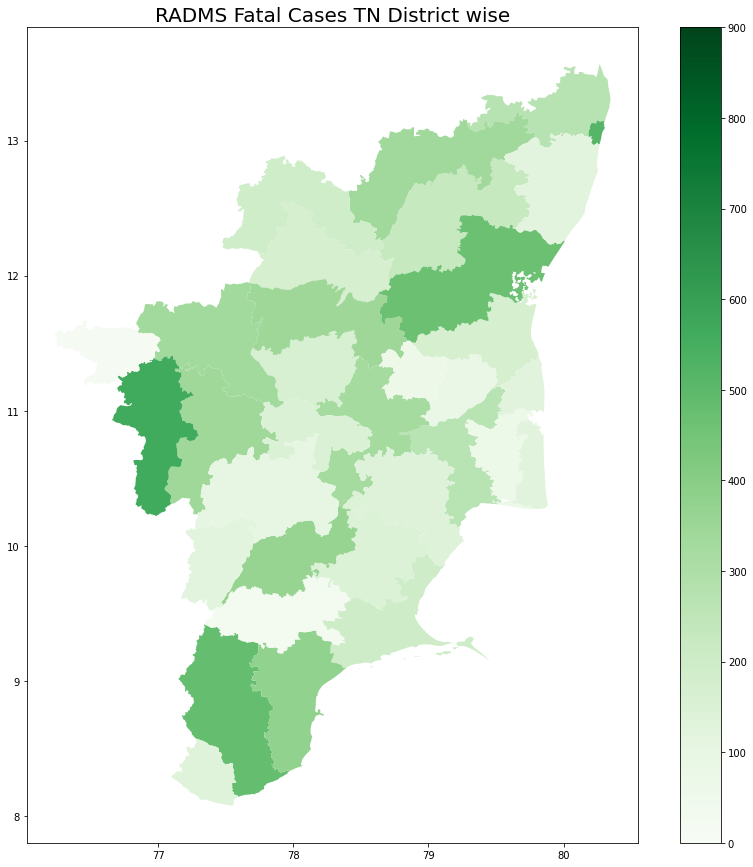

In [44]:
fig,ax = plt.subplots(figsize = (15,15))
geo_tn.plot(ax = ax,column = 'Fatal', cmap='Greens', alpha = 1, figsize=(15,15), vmin = 0, vmax = 900,legend=True)
plt.title('RADMS Fatal Cases TN District wise', size=20)
plt.show()

In [53]:
lats, longs, dist_names = [], [], []

for i in range(32):
    lats.append(geo_tn.iloc[i].geometry.centroid.x)
    longs.append(geo_tn.iloc[i].geometry.centroid.y)
    dist_names.append(geo_tn.iloc[i].distname)

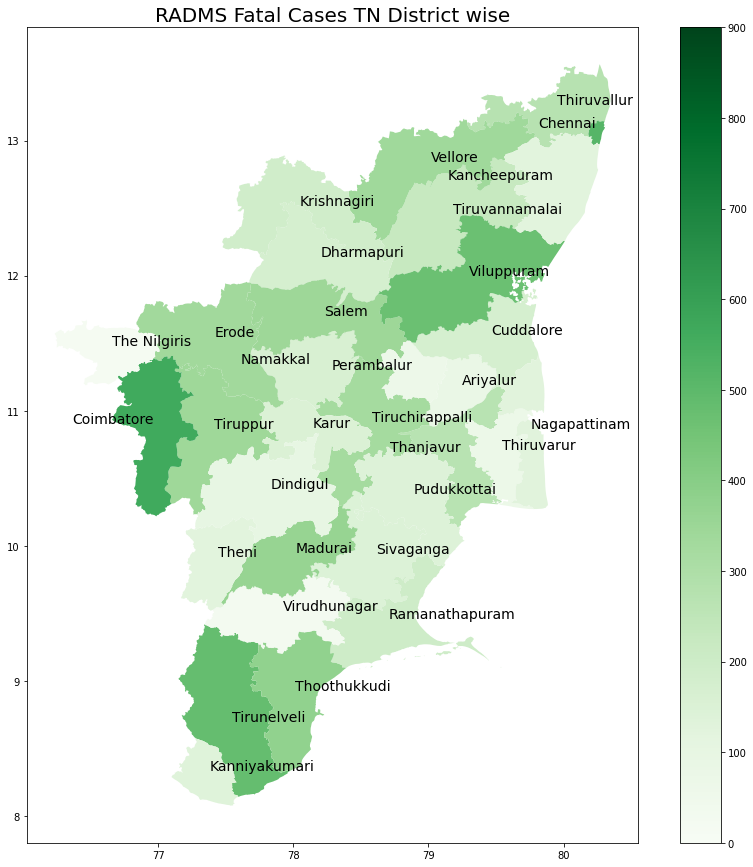

In [68]:
fig,ax = plt.subplots(figsize = (15,15))
geo_tn.plot(ax = ax,column = 'Fatal', cmap='Greens', alpha = 1, figsize=(15,15), vmin = 0, vmax = 900,legend=True)
plt.title('RADMS Fatal Cases TN District wise', size=20)

texts = [plt.text(lats[i], longs[i], dist_names[i], size=14) for i in range(32)]
adjust_text(texts)
plt.show()

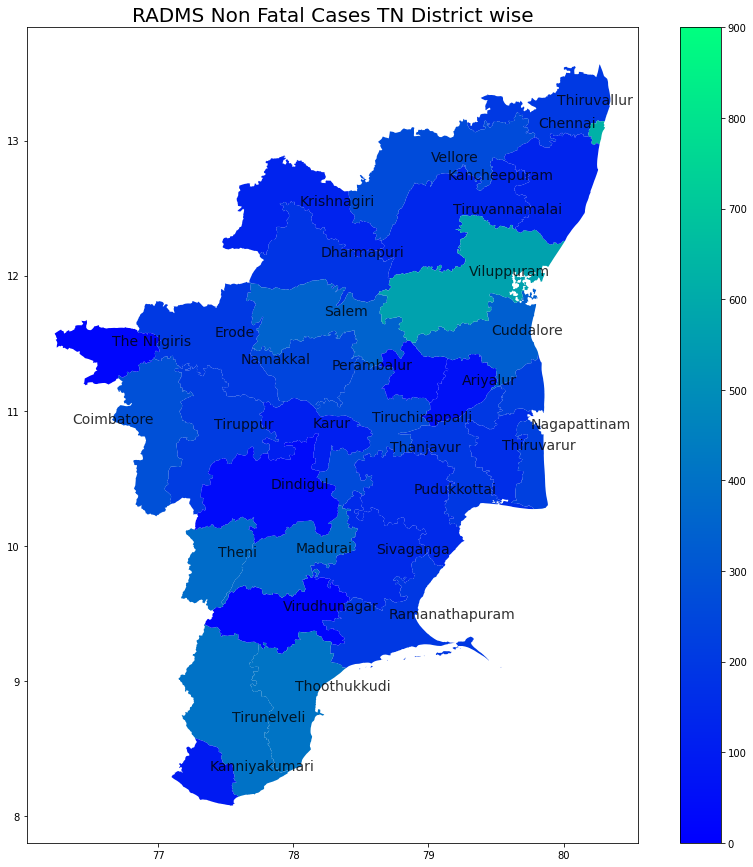

In [75]:
fig,ax = plt.subplots(figsize = (15,15))
geo_tn.plot(ax = ax,column = 'Non-Fatal', cmap='winter', alpha = 1, figsize=(15,15), vmin = 0, vmax = 900,legend=True)
plt.title('RADMS Non Fatal Cases TN District wise', size=20)

texts = [plt.text(lats[i], longs[i], dist_names[i], alpha = 0.8,size=14) for i in range(32)]
adjust_text(texts)
plt.savefig('non-fatal.jpeg')
plt.show()